# Práctica I

## Nombre: Arturo Alonso Carbonero

Valor de la práctica en el curso 2 puntos. Calificación de la práctica sobre 10.

### Primer Ejercicio 
    
1 Lee la imagen indexada `trees.tif` con `Image` de `PIL`, crea una paleta que corresponda a niveles de gris (la misma proporción de rojo, verde y azul) y muestra la imagen con la nueva paleta. 

2 Realiza ahora la misma operación pero con una paleta que solo tenga rojo.
    
3 Convierte ambas imágenes indexadas a imágenes de niveles de gris. El nivel de gris deberá ser el promedio de rojo, verde y azul en cada píxel. Muestra ambas imágenes. Realiza tu propia implementación.

Total: 2 puntos

In [1]:
PATHIM="./imagenes curso/"
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

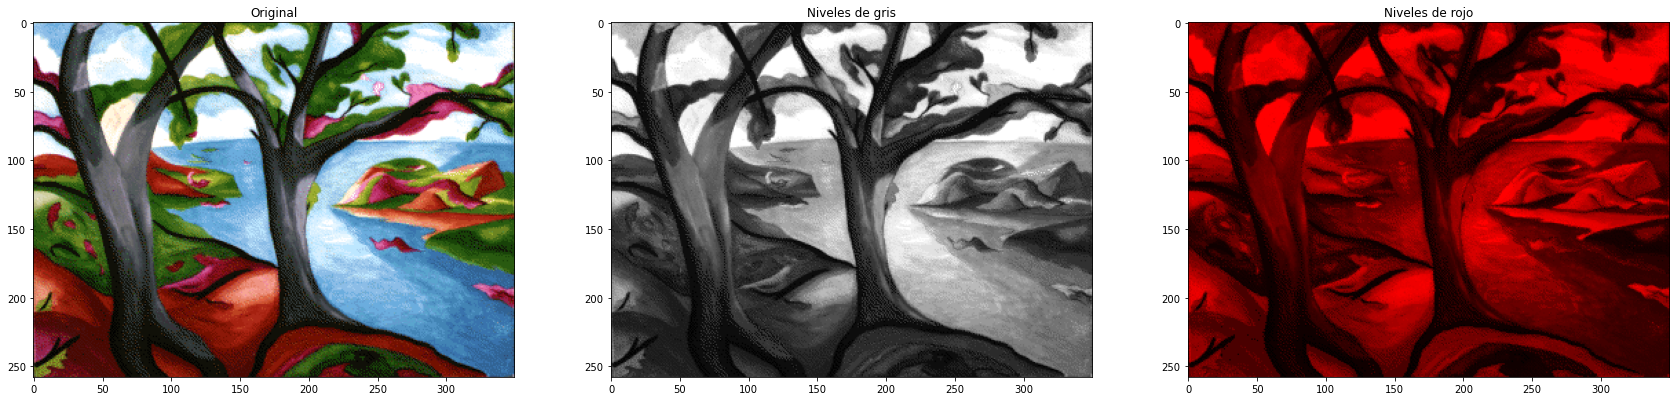

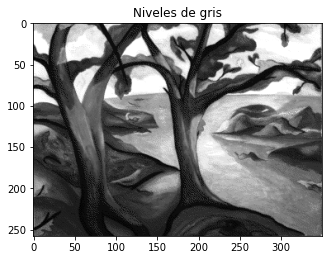

In [2]:
im=PATHIM+"trees.tif"
im=Image.open(im) 
plt.figure(figsize=(50,50))
plt.subplot(1,5,1)
plt.title('Original')
_=plt.imshow(im)

# Escribe aquí tu código que implementa la respuesta a 1.

im_gris=im.copy()
im_paleta=im_gris.getpalette()
im_paleta=np.reshape(im_paleta, (-1, 3))
suma=im_paleta[:,0]+im_paleta[:,1]+im_paleta[:,2]
im_paleta[:,0]=suma/3
im_paleta[:,1]=suma/3
im_paleta[:,2]=suma/3
im_paleta=list(np.reshape(im_paleta, (-1)))

im_gris.putpalette(im_paleta)
plt.subplot(1,5,2)
plt.title('Niveles de gris')
_=plt.imshow(im_gris)

# Escribe aquí tu código que implementa la respuesta a 2.

im_roja=im.copy()
im_paleta=im_roja.getpalette()
im_paleta=np.reshape(im_paleta, (-1, 3))
im_paleta[:,1]=0
im_paleta[:,2]=0
im_paleta=list(np.reshape(im_paleta, (-1)))

im_roja.putpalette(im_paleta)
plt.subplot(1,5,3)
plt.title('Niveles de rojo')
_=plt.imshow(im_roja)

# Escribe aquí tu código que implementa la respuesta a 3.

plt.figure(figsize=(30,30))

im2_gris=im.convert('RGB')
im2_gris_np=np.array(im2_gris, dtype=np.float64) # El tipo es necesario en este caso
im_res=np.zeros_like(im2_gris_np)

im_res=(im2_gris_np[:,:,0]+im2_gris_np[:,:,1]+im2_gris_np[:,:,2])/3

plt.subplot(1,5,4)
plt.title('Niveles de gris')
_=plt.imshow(im_res, cmap='gray')

### Segundo ejercicio

1. Lee la imagen `lindsay.tif` como una imagen de niveles de gris usando `OpenCV`. Selecciona una región dentro de ella y utiliza operadores lógicos para crear una imagen oscura solo dentro de la región de interés mientras que se mantiene la imagen original en el resto.
    
2. Modifica el código del apartado 1 para que la nueva imagen coincida con la imagen original en la región de interés y la parte más oscura fuera.
    
Total: 2 puntos

In [3]:
PATHIM="./imagenes curso/"
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

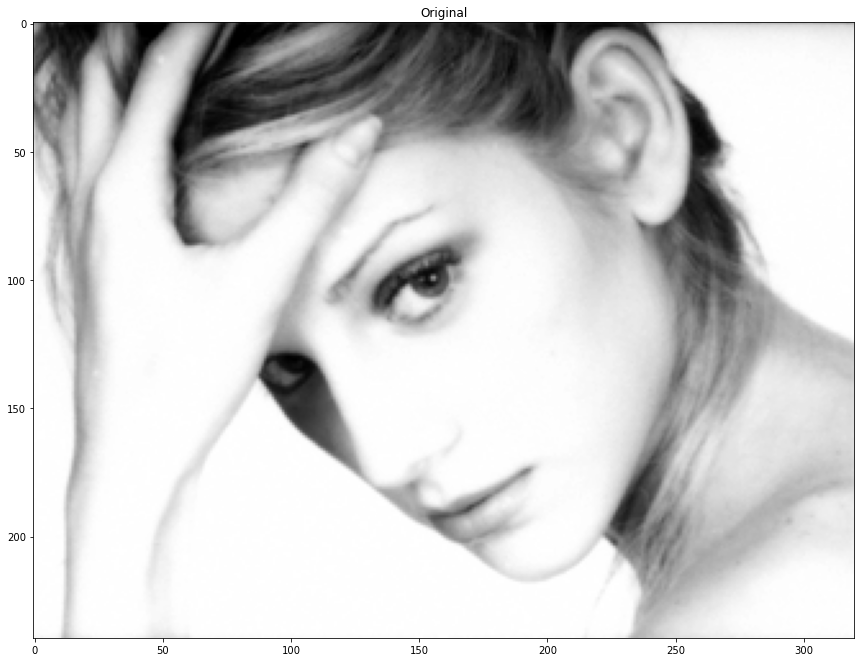

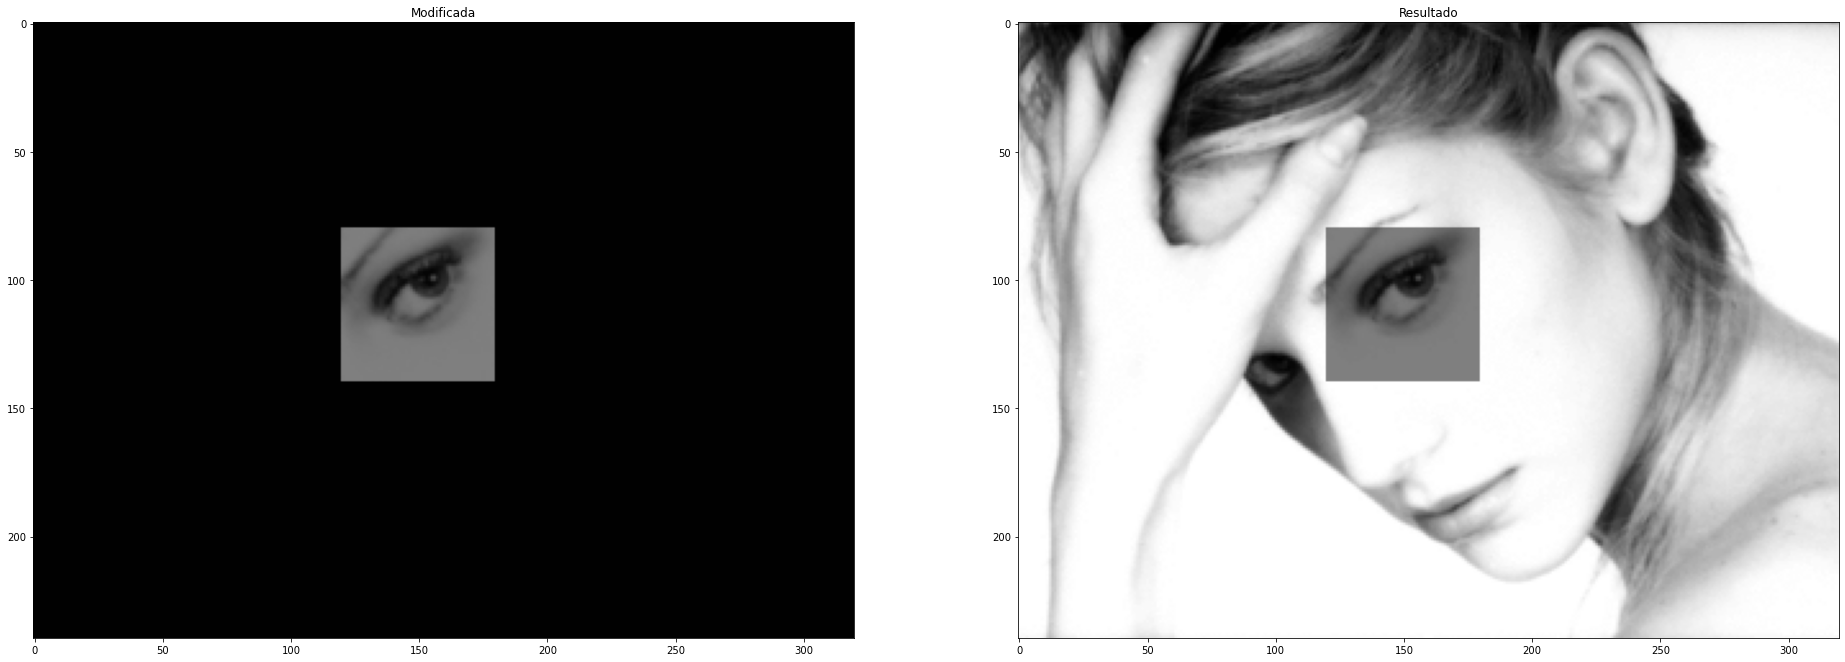

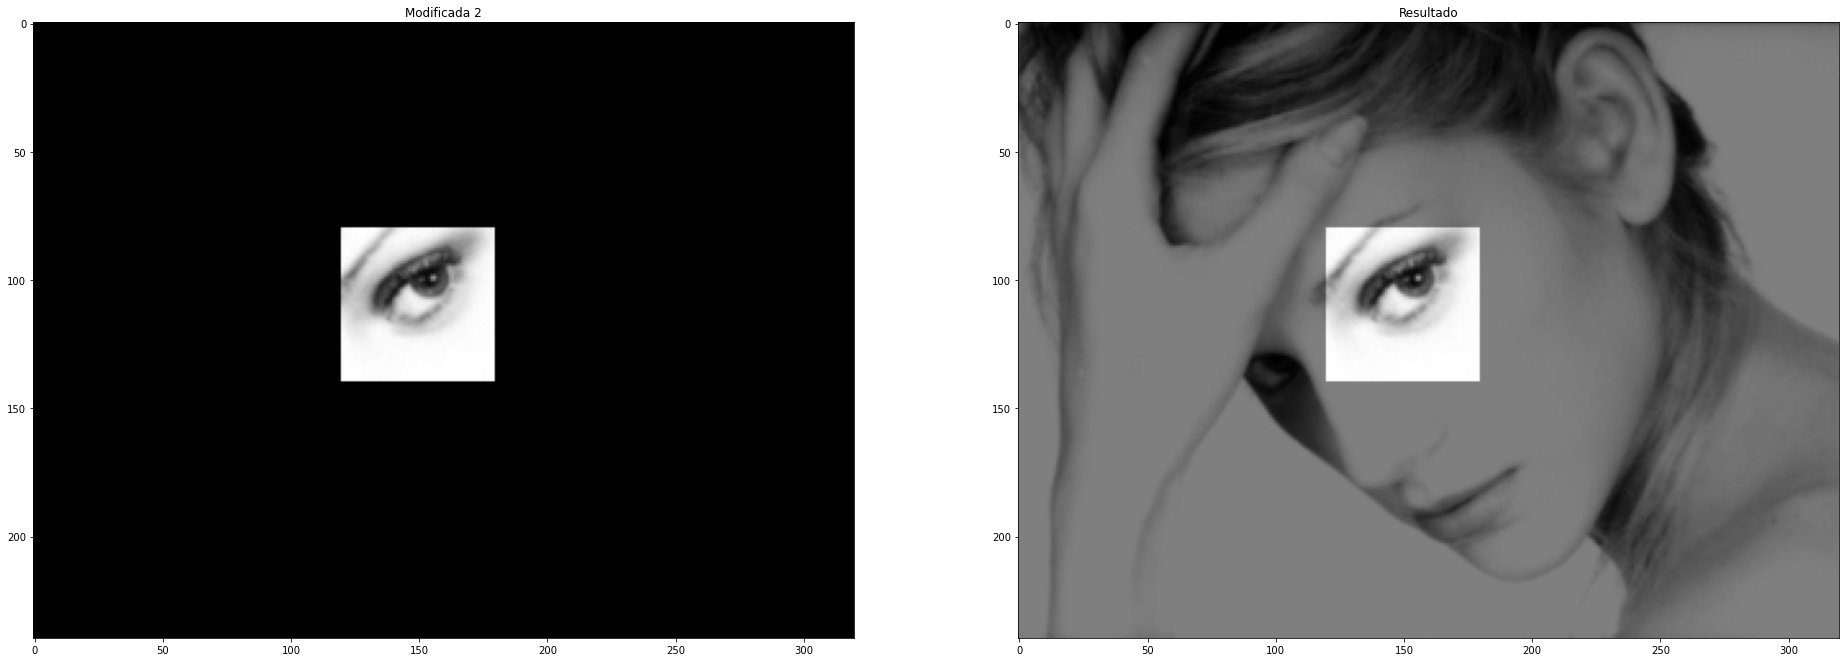

In [4]:
im=PATHIM+"lindsay.tif"
# Incluye aquí la lectura de la imagen

img=cv.imread(im)
plt.figure(figsize=(50,50))
plt.subplot(131)
plt.title('Original')
plt.imshow(img)

# Escribe aquí tu código que implementa la respuesta a a)

img_m=np.ones_like(img) 
img_res1=np.ones_like(img)
centrex,centrey,_=np.array(img_m.shape)//2
img_m[centrex-40:centrex+20,centrey-40:centrey+20]=0.5*img[centrex-40:centrex+20,centrey-40:centrey+20] # Oscurecer
img[centrex-40:centrex+20,centrey-40:centrey+20]=1 # Para utilizar el operador
img_res1=img | img_m # Operador OR

plt.figure(figsize=(50,50))
plt.subplot(131)
plt.title('Modificada')
_=plt.imshow(img_m)

plt.subplot(132)
plt.title('Resultado')
_=plt.imshow(img_res1)

# Escribe aquí tu código que implementa la respuesta a b)

img2=img.copy()
img_m2=img_m.copy() 
img_res2=np.ones_like(img)
centrex,centrey,_=np.array(img_m2.shape)//2
img_m2[centrex-40:centrex+20,centrey-40:centrey+20]=2*img_m2[centrex-40:centrex+20,centrey-40:centrey+20] # Aclarar
img2[:,:]=0.5*img2[:,:]
img_res2=img2 | img_m2

plt.figure(figsize=(50,50))
plt.subplot(131)
plt.title('Modificada 2')
_=plt.imshow(img_m2)

plt.subplot(132)
plt.title('Resultado')
_=plt.imshow(img_res2)

Las dos imágenes siguientes muestran un ejemplo de la solución al apartado 1. Primero se muestra la imagen original y luego la imagen modificada solución del apartado 1.

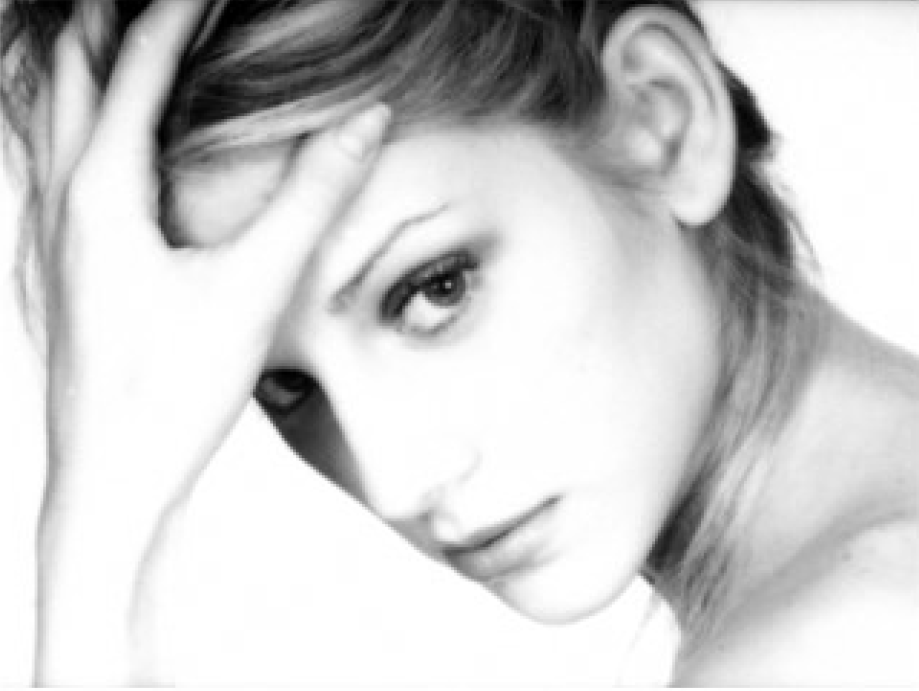

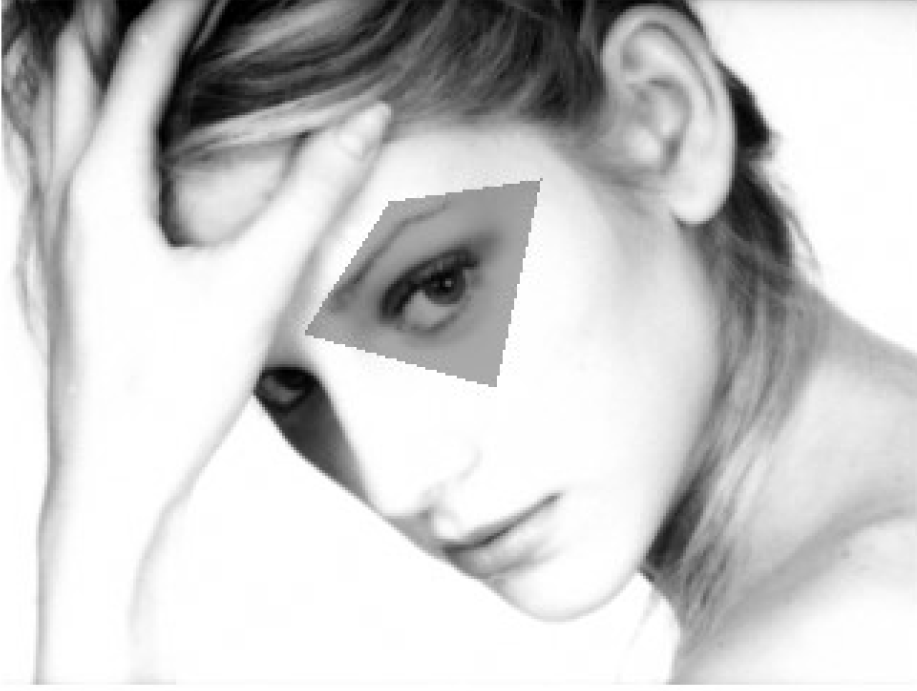

## Tercer ejercicio

1. El código siguiente define dos tipos de transformaciones geométricas: similaridad y afín. Según que la variable `transformationType` sea `Similaridad`o `Afín` implementa una u otra, respectivamente. El código requiere la imagen del objeto al que aplicaremos la transformación geométrica y la máscara donde se encuentra (esta máscara podría haber sido previamente calculada por algún método que veremos a lo largo del curso).

    Explica con detalle los diferentes pasos del código siguiente que realiza la transformación geométrica: indica qué hace el método `intertools.product()`, escribe las ecuaciones de las transformaciones geométricas que implementa el código (cuales son sus matrices de transformación), explica con detalle los diferentes bloques del for, etc. 
    
    Puedes separar el código por bloques y explicarlos separadamente o dejarlo en la misma celda. La explicación puedes realizarla con comentarios en la celda (o celdas si separas el código) o en una o varias celdas de texto. 
    
2. ¿La implementación de la transformación geométrica se realiza con un modelo hacia adelante o hacia atrás?, ¿Corresponderá la imagen 2-D que vemos a alguna transformación rígida 3-D del cubo en el espacio? 
    
Total: 2 puntos.

Tamaño imagen original (columnas, filas,profundidad) (522, 605, 3)
Tamaño imagen máscara (522, 605)


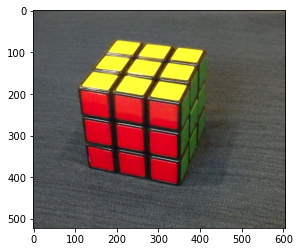

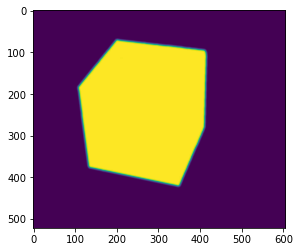

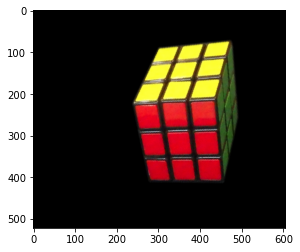

In [7]:
from math import sin, cos, sqrt 
from timeit import itertools
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

PATHIM="./imagenes curso/"

# Imágenes a procesar
imageName = "cube1.png" # Imagen
maskName = "mask1.png" # Máscara

inputImage=Image.open(PATHIM+imageName) # Lectura de la imagen
inputImage=np.array(inputImage)[:,:,0:3] # Paso de la imagen a array de NumPy
width, height = inputImage.shape[1],inputImage.shape[0] # Ancho y alto de la imagen
print("Tamaño imagen original (columnas, filas,profundidad)",inputImage.shape) # Dimensiones de la imagen
plt.imshow(inputImage) # Mostrar la imagen

maskImage=ImageOps.grayscale(Image.open(PATHIM+maskName)) # Creación de la máscara en escala de grises
maskImage=np.array(maskImage) # Paso de la máscara a array de NumPy

widthm, heightm = maskImage.shape[1],maskImage[0] # Ancho y alto de la máscara
print("Tamaño imagen máscara",maskImage.shape) # Dimensiones de la máscara
plt.figure(), plt.imshow(maskImage) # Mostrar la másacara


transformationType  = "Afín"
if transformationType  == "Similaridad":
    s = [.4, 0.8, 0.8, 100.0, 0.0] 
    T = [[ s[1]*cos(s[0]), s[1]*sin(s[0]), s[3]],                        \
         [ -s[2]*sin(s[0]), s[2]*cos(s[0]), s[4]],                       \
         [0 ,0, 1]] # T -> Representación matricial de la transformación
if transformationType  == "Afín":
    T = [[ 0.8, 0.1, 100],                                                  \
         [-0.2, 1, 0],                                                    \
         [0 ,0, 1]] # T -> Representación matricial de la transformación


centreX, centreY = width/2, height/2 # Centro de los ejes
tImage=np.zeros(inputImage.shape,dtype='uint8') # Creación de la imagen que almacenará el resultado

# itertools.product() -> Esta función pertenece a una librería de Python que se emplea para programar 
# de forma más eficiente código con varios iteradores. En este caso, el cálculo que realiaza la función
# es el producto cartesiano de los iteradores que recibe.

for y, x in itertools.product(range(0, height-1), range(0, width-1)): # Prodcuto cartesiano 
    alpha = maskImage[y,x]/256.0 # Valor de la máscara en (x,y) pasado al rango (0,1)
    # El valor de alpha es 0 en toda la imagen salvo en las posiciones correspondientes al cubo
    if alpha == 0: 
        continue # Si alpha=0, salta a la siguiente iteraión del bucle for
   
    # rgb contiene la media de la coordenada (x,y) de la imagen de entrada
    # y las tres coordenadas a su derecha (arriba a la derecha, abajo a la derecha y justo a su derecha)
    # multiplicada por el valor alpha comentado anteriormente (interpolación)
    rgb = (inputImage[y,x]/4.0   + inputImage[y+1,x+1]/4.0 +                \
           inputImage[y+1,x]/4.0 + inputImage[y,x+1]/4.0) * alpha

    
    # Básicamente, lo que se realiza a continuación es la aplicación de la transformación correspondiente
    # a la parte de la imagen que se corresponde con el cubo (alpha!=0). Para ello se deben calcular las nuveas
    # posiciones y llevar el trozo de la imagen deseado a las mismas.
    
    cx, cy = x - centreX, y - centreY # cx y cy contienen el valor del centro de la imagen de entrada menos x e y respectivamente
    p0z = 1.0 
    p1z = 1.0 
    p2z = 1.0 
    
    # Se aplica la transformación a las coordenadas iniciales empleando la matriz T correspondiente
    if p0z != 0 and p1z != 0 and p2z != 0:
        p0x = int((T[0][0] * cx + T[0][1] * cy + T[0][2]) / p0z + centreX)
        p0y = int((T[1][0] * cx + T[1][1] * cy + T[1][2]) / p0z + centreY) 
        p1x = int((T[0][0] * (cx+1) + T[0][1] * cy + T[0][2]) / p1z + centreX)
        p1y = int((T[1][0] * (cx+1) + T[1][1] * cy + T[1][2]) / p1z + centreY) 
        p2x = int((T[0][0] * (cx+1) + T[0][1] * (cy+1) + T[0][2]) / p2z + centreX)
        p2y = int((T[1][0] * (cx+1) + T[1][1] * (cy+1) + T[1][2]) / p2z + centreY) 
        
        # Diferencias entre p1 y p0 y diferencias entre p2 y p0 
        # v1 contienen -1, 0 ó 1 y v2 contiene 0 ó 1
        v1,v2 = [p1x - p0x, p1y - p0y], [p2x - p0x, p2y - p0y]
        
        # Normalizar y calcular las distancias
        lv1 = max(.001,sqrt(v1[0]*v1[0] + v1[1]*v1[1]))
        lv2 = max(.001,sqrt(v2[0]*v2[0] + v2[1]*v2[1]))
        v1N = [v1[0]/lv1, v1[1]/lv1]
        v2N = [v2[0]/lv2, v2[1]/lv2]
        
        for dV1, dV2 in itertools.product(range(0, int(lv1)+1), range(0, int(lv2)+1)): # Producto cartesiano
            # Los valores de a y de b se obtienen en función de los valores de p y las distancias normalizadas calculadas
            a = int(p0x + dV1 * v1N[0] + dV2 * v2N[0]) # Redondeo
            b = int(p0y + dV1 * v1N[1] + dV2 * v2N[1]) # Redondeo
            if a > 0 and a < width and b > 0 and b < height: # a y b != 0 -> no se corresponden con valores del fondo negro.
                tImage[b,a] = rgb # Se almacenan en las nuevas posiciones los valores de rgb en la posición (x,y), es decir,
                # Se emplea un modelo de transformación hacia delante. Esto significa que se calculan las coordenadas de destino
                # y se almacena en ellas el valor correspondientes. a y b pueden no ser enteros por lo que deben redondearse, 
                # por eso se utiliza la funcion int() en su cálculo.

plt.figure()
_=plt.imshow(tImage)

# El resultado final es la imagen del cubo alineando el lado inferior de la cara roja con el eje x

### Cuarto Ejercicio

Modifica el código anterior para que también pueda realizar una homografía. Para ello debes añadir a la celda siguiente el código que necesites de la anterior y cambiar lo que sea necesario. 
    
Total: 2 puntos.

Tamaño imagen original (columnas, filas,profundidad) (522, 605, 3)
Tamaño imagen máscara (522, 605)


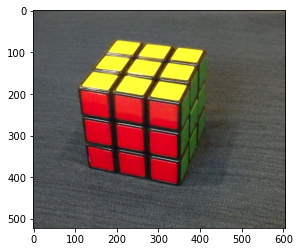

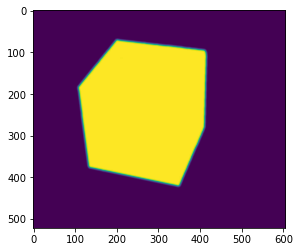

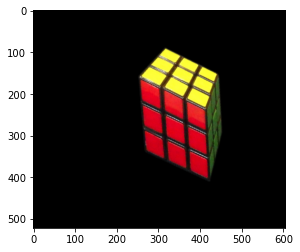

In [8]:
PATHIM="./imagenes curso/"

imageName = "cube1.png"
maskName = "mask1.png"

inputImage=Image.open(PATHIM+imageName)
inputImage=np.array(inputImage)[:,:,0:3]
width, height = inputImage.shape[1],inputImage.shape[0]
print("Tamaño imagen original (columnas, filas,profundidad)",inputImage.shape)
plt.imshow(inputImage)

maskImage=ImageOps.grayscale(Image.open(PATHIM+maskName))
maskImage=np.array(maskImage)

widthm, heightm = maskImage.shape[1],maskImage[0]
print("Tamaño imagen máscara",maskImage.shape)
plt.figure(), plt.imshow(maskImage)

transformationType  = "Homografía"
if transformationType  == "Similaridad":
    s = [.4, 0.8, 0.8, 100.0, 0.0] 
    T = [[ s[1]*cos(s[0]), s[1]*sin(s[0]), s[3]],                        \
         [ -s[2]*sin(s[0]), s[2]*cos(s[0]), s[4]],                       \
         [0 ,0, 1]]
if transformationType  == "Afín":
    # Affine transformation
    T = [[ 0.8, 0.1, 100],                                                  \
         [-0.2, 1, 0],                                                    \
         [0 ,0, 1]]
if transformationType  == "Homografía":
    # Homography
    T = [[ .8, 0, 100],                                                    \
         [ .2, 1, 0],                                                       \
         [.0005 ,-0.0005 , 1.2]]
    
centreX, centreY = width/2, height/2 
tImage=np.zeros(inputImage.shape,dtype='uint8') 

for y, x in itertools.product(range(0, height-1), range(0, width-1)):  
    alpha = maskImage[y,x]/256.0 
    if alpha == 0: 
        continue
    rgb = (inputImage[y,x]/4.0   + inputImage[y+1,x+1]/4.0 +                \
           inputImage[y+1,x]/4.0 + inputImage[y,x+1]/4.0) * alpha
    
    cx, cy = x - centreX, y - centreY 
    p0z = 1.0 
    p1z = 1.0 
    p2z = 1.0 
    
    # Es necesario adaptar este fragmento del código a la fórmula de la trasformación proyectiva dividiendo
    # para cada x e y por (T(2,0)*u + T(2,1)*v + T(2,2))
    if p0z != 0 and p1z != 0 and p2z != 0:
        p0x = int(((T[0][0] * cx + T[0][1] * cy + T[0][2])/(T[2][0] * cx + T[2][1] * cy + T[2][2])) / p0z + centreX)
        p0y = int(((T[1][0] * cx + T[1][1] * cy + T[1][2])/(T[2][0] * cx + T[2][1] * cy + T[2][2])) / p0z + centreY) 
        p1x = int(((T[0][0] * (cx+1) + T[0][1] * cy + T[0][2])/(T[2][0] * (cx+1) + T[2][1] * cy + T[2][2])) / p1z + centreX)
        p1y = int(((T[1][0] * (cx+1) + T[1][1] * cy + T[1][2])/(T[2][0] * (cx+1) + T[2][1] * cy + T[2][2])) / p1z + centreY) 
        p2x = int(((T[0][0] * (cx+1) + T[0][1] * (cy+1) + T[0][2])/(T[2][0] * (cx+1) + T[2][1] * (cy+1) + T[2][2])) / p2z + centreX)
        p2y = int(((T[1][0] * (cx+1) + T[1][1] * (cy+1) + T[1][2])/(T[2][0] * (cx+1) + T[2][1] * (cy+1) + T[2][2])) / p2z + centreY) 
        
        
        v1,v2 = [p1x - p0x, p1y - p0y], [p2x - p0x, p2y - p0y]
        
        lv1 = max(.001,sqrt(v1[0]*v1[0] + v1[1]*v1[1]))
        lv2 = max(.001,sqrt(v2[0]*v2[0] + v2[1]*v2[1]))
        v1N = [v1[0]/lv1, v1[1]/lv1]
        v2N = [v2[0]/lv2, v2[1]/lv2]
        
        for dV1, dV2 in itertools.product(range(0, int(lv1)+1), range(0, int(lv2)+1)):
            a = int(p0x + dV1 * v1N[0] + dV2 * v2N[0])
            b = int(p0y + dV1 * v1N[1] + dV2 * v2N[1])
            if a > 0 and a < width and b > 0 and b < height:
                tImage[b,a] = rgb

plt.figure()
_=plt.imshow(tImage)

### Quinto Ejercicio

Escribe una función que acepte como entrada dos imágenes almacenadas como arrays de NumPy y devuelva la imagen diferencia de ambas. Esta diferencia debe ser cero si y solo si ambas imágenes son iguales. Gestiona los posibles tipos de datos en los arrays y que las imágenes, por error, tengan diferente tamaño.

Incluye diferentes ejemplos de aplicación con las imágenes del curso.

Total: 2 punto.

In [9]:
from math import sin, cos, sqrt 
from timeit import itertools
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

PATHIM="./imagenes curso/"

def imagenDiferencia(im1, im2): # Función que recibe dos imágenes 
    
    width1, height1=im1.shape[1],im1.shape[0] # Ancho y alto de la imagen 1
    width2, height2=im2.shape[1],im2.shape[0] # Ancho y alto de la imagen 2
    
    im_null=np.ones((1,1), dtype=np.float64) # Imagen nula
    im1=np.array(im1, dtype=np.float64) # Paso a float64
    im2=np.array(im2, dtype=np.float64) # Paso a float64
    
    # La siguiente estructura condicional comprueba que las imágenes que la función ha recibido tienen la misma dimensión.
    # Si es así, calcula la diferencia y la devuelve. En caso contrario, devuelve la imagen nula creada anteriormente.
    if width1 == width2 and height1 == height2: 
        im_dif=np.abs(im1-im2)
        # im_dif=im_dif*im_dif
        im_dif=np.array(im_dif, dtype=np.float64)
        im_res=im_dif
    else:
        im_res=im_null # Si las imágenes a procesar no tienen el mismo tamaño devuelve la imagen 'im1'
        im_res=np.array(im_res, dtype=np.float64)
    
    return im_res

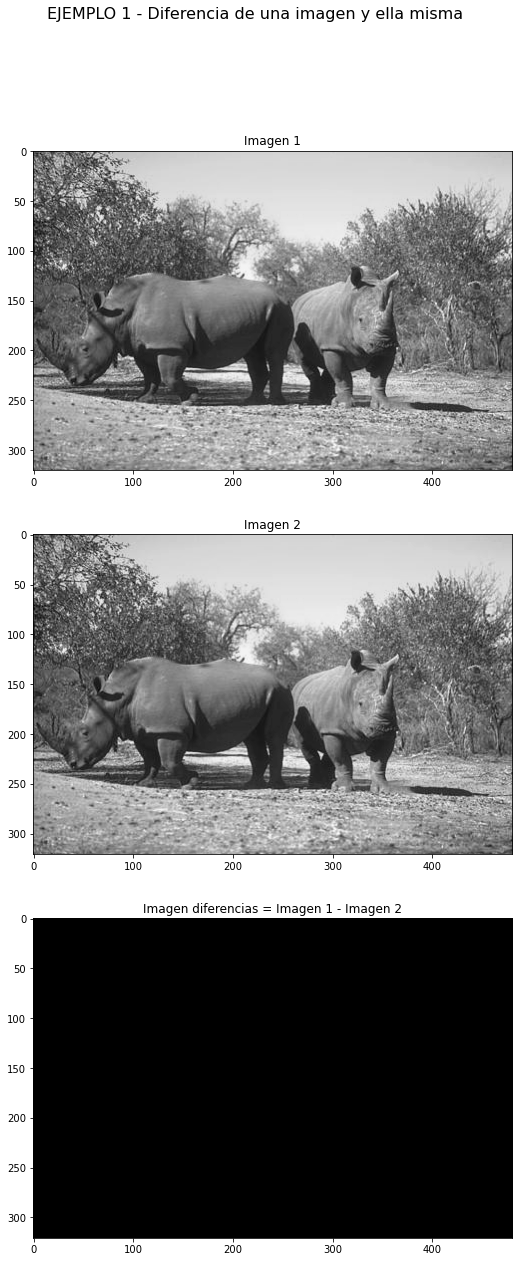

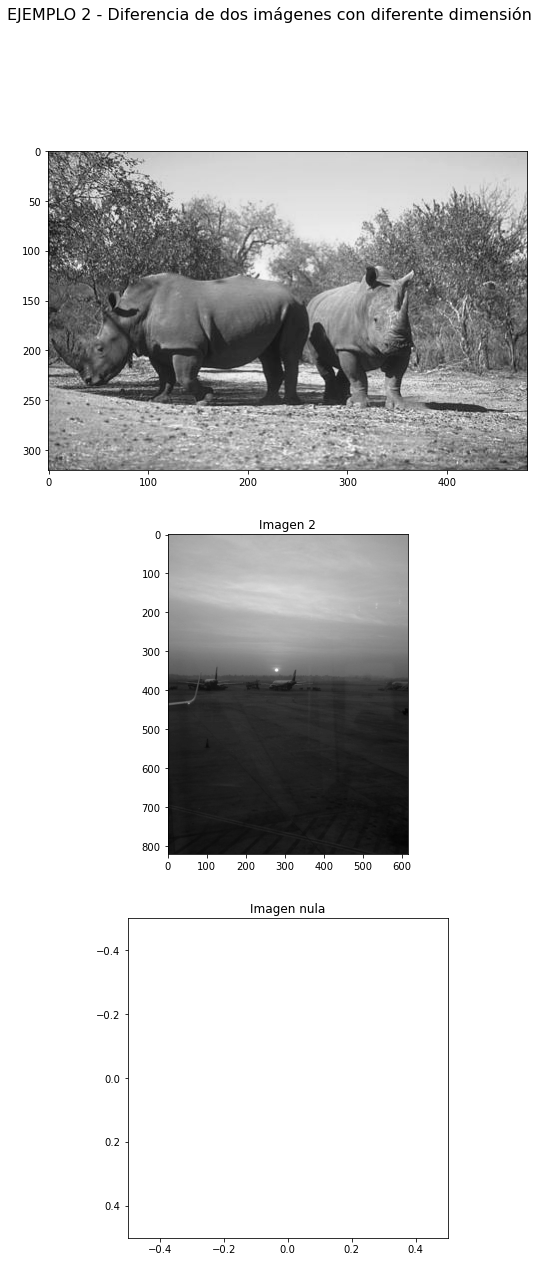

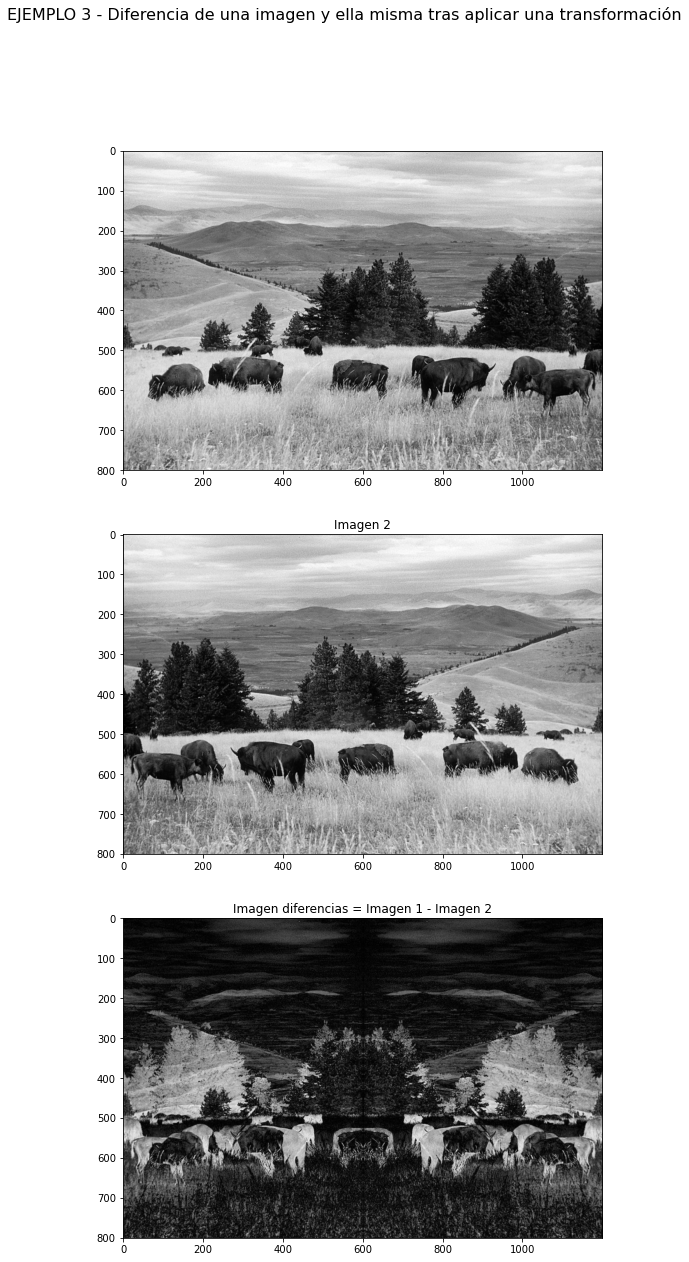

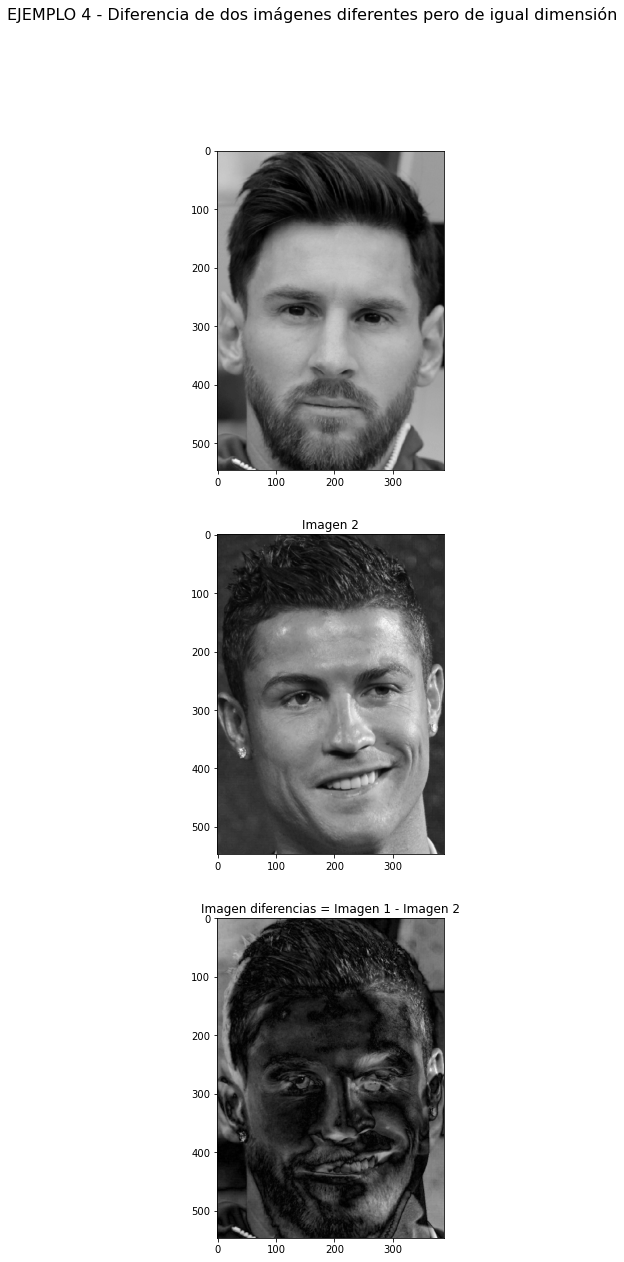

In [10]:
# EJEMPLO 1 - Diferencia de una imagen y ella misma

# Lectura de imágenes
im1=np.array(Image.open(PATHIM+'rhino.jpg').convert('L')) 
im2=im1

im_res=imagenDiferencia(im1, im2) # Cálculo de la diferencia
width_res, height_res=im_res.shape[1],im_res.shape[0] # Dimensión de la imagen resultado

# Mostrar resultados 
plt.figure(figsize=(20,20))
plt.suptitle('EJEMPLO 1 - Diferencia de una imagen y ella misma', fontsize=16)
plt.subplot(3,1,1)
plt.title('Imagen 1')
plt.imshow(im1, cmap='gray')
plt.subplot(3,1,2)
plt.title('Imagen 2')
plt.imshow(im2, cmap='gray')

# Si la imagen resultado tiene tamaño 1x1 se trata de la imagen nula.
# En caso contrario, se trata de la diferencia de im1 e im2
if width_res==1 and height_res==1:
    plt.subplot(3,1,3)
    plt.title('Imagen nula')
    _=plt.imshow(im_res, cmap='binary')
else:
    plt.subplot(3,1,3)
    plt.title('Imagen diferencias = Imagen 1 - Imagen 2')
    _=plt.imshow(im_res, cmap='gray')
# print(im_res)


# EJEMPLO 2 - Diferencia de dos imágenes con diferente dimensión

im1=np.array(Image.open(PATHIM+'rhino.jpg').convert('L'))
im2=np.array(Image.open(PATHIM+'aero.jpg').convert('L'))

im_res=imagenDiferencia(im1, im2)
width_res, height_res=im_res.shape[1],im_res.shape[0]

plt.figure(figsize=(20,20))
plt.suptitle('EJEMPLO 2 - Diferencia de dos imágenes con diferente dimensión', fontsize=16)
plt.subplot(3,1,1)
plt.imshow(im1, cmap='gray')
plt.subplot(3,1,2)
plt.title('Imagen 2')
plt.imshow(im2, cmap='gray')

if width_res==1 and height_res==1:
    plt.subplot(3,1,3)
    plt.title('Imagen nula')
    _=plt.imshow(im_res, cmap='binary')
else:
    plt.subplot(3,1,3)
    plt.title('Imagen diferencias = Imagen 1 - Imagen 2')
    _=plt.imshow(im_res, cmap='gray')
# print(im_res)


# EJEMPLO 3 - Diferencia de una imagen y ella misma tras aplicar una transformación

im1=np.array(Image.open(PATHIM+"bisons.jpg").convert('L'))
im2=im1

# Transformación afín para invertir la imagen respecto al eje y
w, h=im2.shape[1],im2.shape[0]
mat_reflect=np.array([[1,0,0],[0,-1,w],[0,0,1]])
im2=ndi.affine_transform(im2, mat_reflect)

im_res=imagenDiferencia(im1, im2)
width_res, height_res=im_res.shape[1],im_res.shape[0]

plt.figure(figsize=(20,20))
plt.suptitle('EJEMPLO 3 - Diferencia de una imagen y ella misma tras aplicar una transformación', fontsize=16)
plt.subplot(3,1,1)
plt.imshow(im1, cmap='gray')
plt.subplot(3,1,2)
plt.title('Imagen 2')
plt.imshow(im2, cmap='gray')

if width_res==1 and height_res==1:
    plt.subplot(3,1,3)
    plt.title('Imagen nula')
    _=plt.imshow(im_res, cmap='binary')
else:
    plt.subplot(3,1,3)
    plt.title('Imagen diferencias = Imagen 1 - Imagen 2')
    _=plt.imshow(im_res, cmap='gray')
# print(im_res)


# EJEMPLO 4 - Diferencia de dos imágenes diferentes pero de igual dimensión

im1=np.array(Image.open(PATHIM+"messi.png").convert('L'))
im2=np.array(Image.open(PATHIM+"ronaldo.png").convert('L')) 

im_res=imagenDiferencia(im1, im2)
width_res, height_res=im_res.shape[1],im_res.shape[0]

plt.figure(figsize=(20,20))
plt.suptitle('EJEMPLO 4 - Diferencia de dos imágenes diferentes pero de igual dimensión', fontsize=16)
plt.subplot(3,1,1)
plt.imshow(im1, cmap='gray')
plt.subplot(3,1,2)
plt.title('Imagen 2')
plt.imshow(im2, cmap='gray')

if width_res==1 and height_res==1:
    plt.subplot(3,1,3)
    plt.title('Imagen nula')
    _=plt.imshow(im_res, cmap='binary')
else:
    plt.subplot(3,1,3)
    plt.title('Imagen diferencias = Imagen 1 - Imagen 2')
    _=plt.imshow(im_res, cmap='gray')
# print(im_res)